In [1201]:
import pandas as pd

In [1202]:
df_pop = pd.read_csv('df_pop.csv', encoding='latin')

df_veg = pd.read_csv('df_veg.csv', encoding='latin')

df_anim = pd.read_csv('df_anim.csv', encoding='latin')

In [1203]:
df_veg.head()

,ï»¿Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,Fc,Calculated data
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,161.93,Fc,Calculated data
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.00,Fc,Calculated data
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1387.00,Fc,Calculated data
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,Fc,Calculated data


## Nettoyer les titres de colonnes

In [1204]:
df_pop.columns = df_pop.columns.str.strip().str.lower().str.replace(' ', '_')
df_veg.columns = df_veg.columns.str.strip().str.lower().str.replace(' ', '_')
df_anim.columns = df_anim.columns.str.strip().str.lower().str.replace(' ', '_')

## Quelle est la dimension des jeux de données ?

In [1205]:
print(df_pop.shape)
print(df_veg.shape)
print(df_anim.shape)

(358, 14)
(91068, 14)
(30897, 14)


## A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [1206]:
df_pop.head()

,ï»¿domain_code,domain,area_code_(fao),area,element_code,element,item_code,item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172.0,*,Unofficial figure
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38042.0,*,Unofficial figure
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883.0,*,Unofficial figure
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2881.0,*,Unofficial figure
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,42228.0,*,Unofficial figure


In [1207]:
df_veg.head()

,ï»¿domain_code,domain,area_code_(fao),area,element_code,element,item_code,item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,Fc,Calculated data
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,161.93,Fc,Calculated data
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.00,Fc,Calculated data
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1387.00,Fc,Calculated data
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,Fc,Calculated data


In [1208]:
df_anim.head()

,ï»¿domain_code,domain,area_code_(fao),area,element_code,element,item_code,item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,Fc,Calculated data
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2019,2019,kg,2.65,Fc,Calculated data
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,2018,kcal/capita/day,15.00,Fc,Calculated data
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2019,2019,kcal/capita/day,16.00,Fc,Calculated data
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,2018,g/capita/day,1.09,Fc,Calculated data


## Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal product’ et ‘vegetal_product’. Une fois cette étape effectuée, regroupez les deux jeux de données en 1 et appelez ce DataFrame product. Attention à bien comprendre la structure des données pour utiliser la bonne méthode.

In [1209]:
df_veg['type'] = 'vegetal'
df_anim['type'] = 'animal'

In [1210]:
products = pd.concat([df_veg, df_anim])

## Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population

In [1211]:
df_pop.head()

,ï»¿domain_code,domain,area_code_(fao),area,element_code,element,item_code,item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172.0,*,Unofficial figure
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38042.0,*,Unofficial figure
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883.0,*,Unofficial figure
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2881.0,*,Unofficial figure
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,42228.0,*,Unofficial figure


In [1212]:
df_pop = df_pop[['area_code_(fao)', 'area', 'year', 'value']]

In [1213]:
df_pop.columns = ['area_code_(fao)', 'area', 'year', 'pop_1000_hab']

## Transformez products afin de ne garder que les colonnes area_code, area, element, item, year, type, unit.

In [1214]:
products

,ï»¿domain_code,domain,area_code_(fao),area,element_code,element,item_code,item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,Fc,Calculated data,vegetal
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,161.93,Fc,Calculated data,vegetal
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.00,Fc,Calculated data,vegetal
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1387.00,Fc,Calculated data,vegetal
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,Fc,Calculated data,vegetal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30892,FBS,Food Balances (2010-),181,Zimbabwe,664,Food supply (kcal/capita/day),2775,Aquatic Plants,2019,2019,kcal/capita/day,0.00,Fc,Calculated data,animal
30893,FBS,Food Balances (2010-),181,Zimbabwe,674,Protein supply quantity (g/capita/day),2775,Aquatic Plants,2018,2018,g/capita/day,0.00,Fc,Calculated data,animal
30894,FBS,Food Balances (2010-),181,Zimbabwe,674,Protein supply quantity (g/capita/day),2775,Aquatic Plants,2019,2019,g/capita/day,0.00,Fc,Calculated data,animal
30895,FBS,Food Balances (2010-),181,Zimbabwe,684,Fat supply quantity (g/capita/day),2775,Aquatic Plants,2018,2018,g/capita/day,0.00,Fc,Calculated data,animal


In [1215]:
products = products[['area_code_(fao)', 'area', 'element', 'item', 'year', 'type', 'value']]

In [1216]:
df_pop

,area_code_(fao),area,year,pop_1000_hab
0,2,Afghanistan,2018,37172.0
1,2,Afghanistan,2019,38042.0
2,3,Albania,2018,2883.0
3,3,Albania,2019,2881.0
4,4,Algeria,2018,42228.0
...,...,...,...,...
353,249,Yemen,2019,29162.0
354,251,Zambia,2018,17352.0
355,251,Zambia,2019,17861.0
356,181,Zimbabwe,2018,14439.0


## Fusionnez df_pop avec product et nommez ce DataFrame df.  

In [1217]:
df = pd.merge(df_pop, products, on=['area', 'area_code_(fao)', 'year'])
df.head()

,area_code_(fao),area,year,pop_1000_hab,element,item,type,value
0,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,160.12
1,2,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Wheat and products,vegetal,1372.00
2,2,Afghanistan,2018,37172.0,Protein supply quantity (g/capita/day),Wheat and products,vegetal,37.00
3,2,Afghanistan,2018,37172.0,Fat supply quantity (g/capita/day),Wheat and products,vegetal,4.59
4,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Rice and products,vegetal,19.78


In [1218]:
df.columns = ['code_country', 'country', 'year', 'pop_1000_hab', 'element', 'item',
       'type', 'value']

## Quelles sont les types de données de chaque colonne ? Si certains types de données ne sont pas dans la bonne catégorie, modifiez leur type.

In [1219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121965 entries, 0 to 121964
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   code_country  121965 non-null  int64  
 1   country       121965 non-null  object 
 2   year          121965 non-null  int64  
 3   pop_1000_hab  121965 non-null  float64
 4   element       121965 non-null  object 
 5   item          121965 non-null  object 
 6   type          121965 non-null  object 
 7   value         121965 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 8.4+ MB


In [1220]:
#df['code_country'] = df['code_country'].astype('category')

## Combien y-a t’il de valeurs manquantes par variable ?

In [1221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121965 entries, 0 to 121964
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   code_country  121965 non-null  int64  
 1   country       121965 non-null  object 
 2   year          121965 non-null  int64  
 3   pop_1000_hab  121965 non-null  float64
 4   element       121965 non-null  object 
 5   item          121965 non-null  object 
 6   type          121965 non-null  object 
 7   value         121965 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 8.4+ MB


## Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.

In [1222]:
df_pop.describe()

,area_code_(fao),year,pop_1000_hab
count,358.000000,358.0000,3.580000e+02
mean,127.407821,2018.5000,4.252883e+04
std,73.175022,0.5007,1.516993e+05
min,1.000000,2018.0000,5.200000e+01
25%,66.250000,2018.0000,2.821000e+03
50%,123.000000,2018.5000,9.758265e+03
75%,190.500000,2019.0000,3.071200e+04
max,276.000000,2019.0000,1.433784e+06


## Affichez les valeurs uniques de la colonne ‘area’

In [1223]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "CÃ´te d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gam

## Modifiez votre jeu de données afin que les informations soient indexées par area_country, country, year, pop_1000_hab, type et item. Les valeurs de la colonne element doivent être séparées dans des colonnes différentes. Recherchez sur internet la différence entre les formats long et les formats wide.

In [1224]:
df = df.reset_index()

In [1225]:
x = df.sample(10)

In [1226]:
import numpy as np 
data = pd.pivot_table(df,
    index=["code_country", 'country', 'item',  'pop_1000_hab', 'type', 'year'],
    columns = "element", values="value", aggfunc=np.sum)

In [1227]:
data = data.reset_index()
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
data.head()

element,code_country,country,item,pop_1000_hab,type,year,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,1,Armenia,Apples and products,2952.0,vegetal,2018,0.12,20.0,14.49,0.05
1,1,Armenia,Apples and products,2958.0,vegetal,2019,0.13,21.0,16.02,0.05
2,1,Armenia,"Aquatic Animals, Others",2952.0,animal,2018,0.00,0.0,0.00,0.00
3,1,Armenia,"Aquatic Animals, Others",2958.0,animal,2019,0.00,0.0,0.00,0.00
4,1,Armenia,Aquatic Plants,2952.0,animal,2018,0.00,0.0,0.00,0.00


In [1228]:
data[data['year'] == 2018]

element,code_country,country,item,pop_1000_hab,type,year,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,1,Armenia,Apples and products,2952.0,vegetal,2018,0.12,20.0,14.49,0.05
2,1,Armenia,"Aquatic Animals, Others",2952.0,animal,2018,0.00,0.0,0.00,0.00
4,1,Armenia,Aquatic Plants,2952.0,animal,2018,0.00,0.0,0.00,0.00
6,1,Armenia,Bananas,2952.0,vegetal,2018,0.06,13.0,7.61,0.15
8,1,Armenia,Barley and products,2952.0,vegetal,2018,0.03,6.0,0.72,0.20
...,...,...,...,...,...,...,...,...,...,...
30656,276,Sudan,Tomatoes and products,41802.0,vegetal,2018,0.09,8.0,14.83,0.38
30658,276,Sudan,"Vegetables, other",41802.0,vegetal,2018,0.13,17.0,25.88,0.79
30660,276,Sudan,Wheat and products,41802.0,vegetal,2018,1.68,549.0,63.20,16.43
30662,276,Sudan,Wine,41802.0,vegetal,2018,0.00,0.0,0.00,0.00


## Bonus : création d'un jeu de données qui contient les codes pays et leur zone géographique

In [1229]:
world = ['eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 'northern_america',
 'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 'southern_asia',
 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe',
 'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia'
]


def transform_data(filename=None) :
    """
    Charge un jeu de données.

    Args:
        param1: This is the first param.
        param2: This is a second param.

    Returns:
        A DataFrame.

    Raises:
        KeyError: Raises an exception.
    """
    df = pd.read_csv('geo_zone/'+filename+".csv", usecols=["Area Code (FAO)"])
    df['zone'] = filename
    return df


def aggregate_df(list_filename = world) :
    list_df = []
    for zone in world :
        temp = transform_data(zone)
        list_df.append(temp)
    df = pd.concat(list_df)
    df.columns = ['code_country', 'zone']
    return df

In [1230]:
zone = aggregate_df()

In [1231]:
len(data.code_country.unique())

179

In [1232]:
data = pd.merge(zone, data, on='code_country')

In [1233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30666 entries, 0 to 30665
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   code_country                            30666 non-null  int64  
 1   zone                                    30666 non-null  object 
 2   country                                 30666 non-null  object 
 3   item                                    30666 non-null  object 
 4   pop_1000_hab                            30666 non-null  float64
 5   type                                    30666 non-null  object 
 6   year                                    30666 non-null  int64  
 7   fat_supply_quantity_(g/capita/day)      30447 non-null  float64
 8   food_supply_(kcal/capita/day)           30407 non-null  float64
 9   food_supply_quantity_(kg/capita/yr)     30666 non-null  float64
 10  protein_supply_quantity_(g/capita/day)  30445 non-null  fl

In [1234]:
data.head()

,code_country,zone,country,item,pop_1000_hab,type,year,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,29,eastern_africa,Burundi,Apples and products,11175.37,vegetal,2018,0.00,0.0,0.01,0.00
1,29,eastern_africa,Burundi,Apples and products,11530.58,vegetal,2019,0.00,0.0,0.01,0.00
2,29,eastern_africa,Burundi,Aquatic Plants,11175.37,animal,2018,0.00,0.0,0.00,0.00
3,29,eastern_africa,Burundi,Aquatic Plants,11530.58,animal,2019,0.00,0.0,0.00,0.00
4,29,eastern_africa,Burundi,Bananas,11175.37,vegetal,2018,0.27,164.0,99.63,2.73


# Exploration

Quelle est la médiane de la variable fat_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type ? (il existe une méthode pour visualiser toutes ces informations en même temps). Interprétez ces mesures statistiques dans une phrase.

In [1235]:
data.describe()

,code_country,pop_1000_hab,year,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
count,30666.000000,3.066600e+04,30666.000000,30447.000000,30407.000000,30666.000000,30445.000000
mean,127.113383,4.356649e+04,2018.500033,1.057980,33.892656,7.951519,0.958554
std,73.107989,1.534879e+05,0.500008,3.439065,106.354950,23.010764,3.256233
min,1.000000,5.200000e+01,2018.000000,0.000000,0.000000,0.000000,-0.030000
25%,66.000000,2.883000e+03,2018.000000,0.000000,0.000000,0.020000,0.000000
50%,123.000000,9.972000e+03,2019.000000,0.030000,3.000000,0.580000,0.030000
75%,189.000000,3.182500e+04,2019.000000,0.350000,20.000000,4.580000,0.390000
max,276.000000,1.433784e+06,2019.000000,61.780000,1787.000000,354.130000,47.840000


Visualisez la distribution des données numériques à l’aide d’un histogramme. Utilisez une boucle si nécessaire. Si certaines variables contiennent des valeurs extrêmes vous pouvez effectuer une transformation sur vos données. (En logarithmes par exemple)

In [1236]:
col_num = data.describe().columns

In [1237]:
col_num2 = data.select_dtypes(include=[int, float]).columns

In [1238]:
assert col_num.all() == col_num2.all()

In [1239]:
col_num

Index(['code_country', 'pop_1000_hab', 'year',
       'fat_supply_quantity_(g/capita/day)', 'food_supply_(kcal/capita/day)',
       'food_supply_quantity_(kg/capita/yr)',
       'protein_supply_quantity_(g/capita/day)'],
      dtype='object')

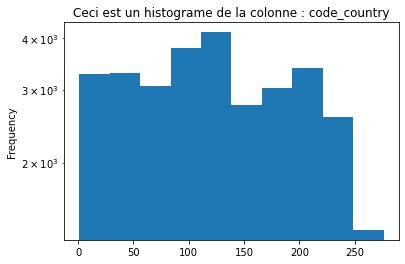

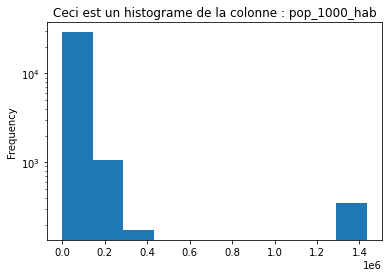

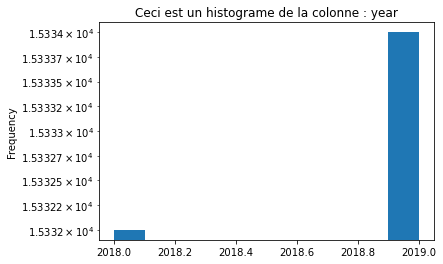

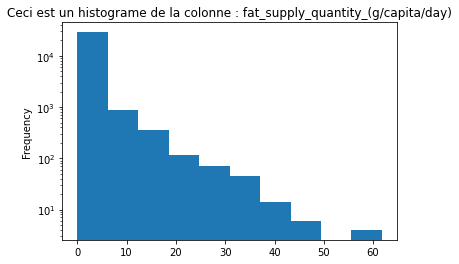

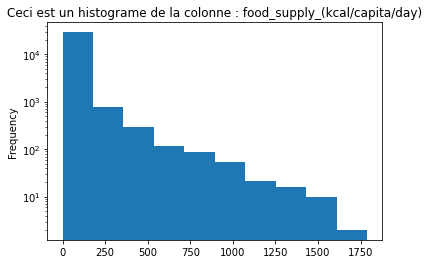

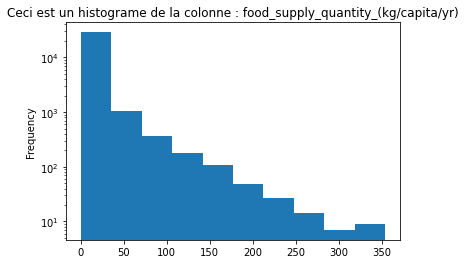

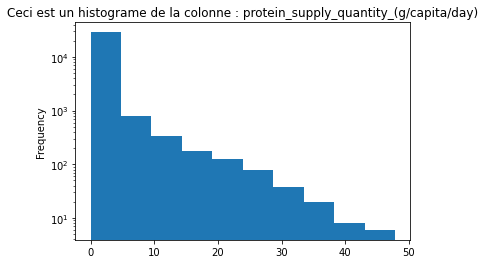

In [1240]:
import matplotlib.pyplot as plt
for col in col_num :
    data[col].plot(kind='hist')
    plt.yscale('log')
    plt.title('Ceci est un histograme de la colonne : {}'.format(col))
    plt.show()

In [1241]:
# pourquoi une échelle logarithmique ?

val_lin = [1, 10, 100, 1000, 10000, 100000, 1000000]

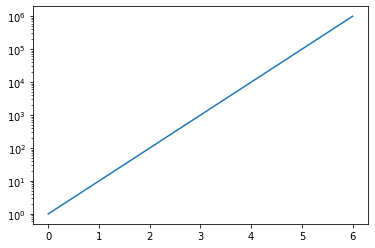

In [1242]:
plt.plot(val_lin)
plt.yscale('log')
plt.show()

Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)

In [1243]:
is_ukraine = data.country == 'Ukraine'
is2018 =  data.year == 2018
is2019 = data.country == 2019

In [1244]:
data[is_ukraine&is2018]['pop_1000_hab'].iloc[0]

44246.0

In [1245]:
is_ukraine&is2018

0        False
1        False
2        False
3        False
4        False
         ...  
30661    False
30662    False
30663    False
30664    False
30665    False
Length: 30666, dtype: bool

In [1246]:
data[is_ukraine&is2018].loc[:,'pop_1000_hab'].unique()[0]

44246.0

Quels sont les 10 pays les plus peuplés ?

In [1247]:
df_pop

,area_code_(fao),area,year,pop_1000_hab
0,2,Afghanistan,2018,37172.0
1,2,Afghanistan,2019,38042.0
2,3,Albania,2018,2883.0
3,3,Albania,2019,2881.0
4,4,Algeria,2018,42228.0
...,...,...,...,...
353,249,Yemen,2019,29162.0
354,251,Zambia,2018,17352.0
355,251,Zambia,2019,17861.0
356,181,Zimbabwe,2018,14439.0


In [1248]:
df_pop[df_pop.year == 2019].sort_values(by='pop_1000_hab', ascending=False).head(10)

,area_code_(fao),area,year,pop_1000_hab
67,41,"China, mainland",2019,1433784.0
151,100,India,2019,1366418.0
341,231,United States of America,2019,329065.0
153,101,Indonesia,2019,270626.0
247,165,Pakistan,2019,216565.0
41,21,Brazil,2019,211050.0
239,159,Nigeria,2019,200964.0
23,16,Bangladesh,2019,163046.0
269,185,Russian Federation,2019,145872.0
213,138,Mexico,2019,127576.0


Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ? Menez votre enquête et faites les corrections nécessaires en cas de problème. Contrôlez vos données grâce à ce site.

In [1249]:
df_pop[df_pop.year == 2018]['pop_1000_hab'].sum()

7572929.33

7,631,091,040

In [1250]:
df_pop_acc = pd.read_csv('df_pop_acc.csv')

In [1251]:
df_pop_acc.columns = df_pop_acc.columns.str.lower().str.strip().str.replace(' ', '_')

In [1252]:
df_pop_acc.value.sum()

7631368.523

In [1253]:
setabc=set(['A','B','C'])

In [1254]:
setbcd = set(['B','C','D'])

In [1255]:
setabc.intersection(setbcd)

{'B', 'C'}

In [1256]:
setabc.union(setbcd)

{'A', 'B', 'C', 'D'}

In [1257]:
setabc.difference(setbcd)

{'A'}

In [1258]:
setbcd.difference(setabc)

{'D'}

In [1259]:
df_pop['area_code_(fao)']

0        2
1        2
2        3
3        3
4        4
      ... 
353    249
354    251
355    251
356    181
357    181
Name: area_code_(fao), Length: 358, dtype: int64

In [1260]:
set_pop = set(df_pop['area_code_(fao)'])

In [1261]:
set(df_pop['area_code_(fao)'])

{1,
 2,
 3,
 4,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 16,
 19,
 20,
 21,
 23,
 25,
 27,
 28,
 29,
 32,
 33,
 35,
 37,
 38,
 39,
 40,
 41,
 44,
 45,
 46,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 63,
 66,
 67,
 68,
 70,
 72,
 73,
 74,
 75,
 79,
 80,
 81,
 83,
 84,
 86,
 89,
 90,
 91,
 93,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 126,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 136,
 137,
 138,
 141,
 143,
 144,
 146,
 147,
 149,
 150,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 162,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 175,
 176,
 181,
 183,
 184,
 185,
 188,
 189,
 191,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 202,
 203,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 220,
 221,
 222,
 223,
 225,
 226,
 229,
 230,
 231,
 233,
 234,
 235,
 236,
 237,
 238,
 244,
 249,
 250,
 251,
 255,
 256,
 272,
 273,
 276}

In [1262]:
set_pop_acc = set(df_pop_acc['area_code_(fao)'])

In [1263]:
list_diff_pop = list(set_pop_acc.difference(set_pop))

In [1264]:
df_pop_acc['area_code_(fao)'].isin(list_diff_pop)

0      False
1      False
2      False
3       True
4       True
       ...  
231     True
232     True
233    False
234    False
235    False
Name: area_code_(fao), Length: 236, dtype: bool

In [1265]:
len(df_pop_acc[df_pop_acc['area_code_(fao)'].isin(list_diff_pop)].area)

57

In [1266]:
7,713,468,100

(7, 713, 468, 100)

Pour quels pays dispose-t-on du moins d’informations (nombre de valeurs manquantes) ? Donnez-en 5.

<AxesSubplot:>

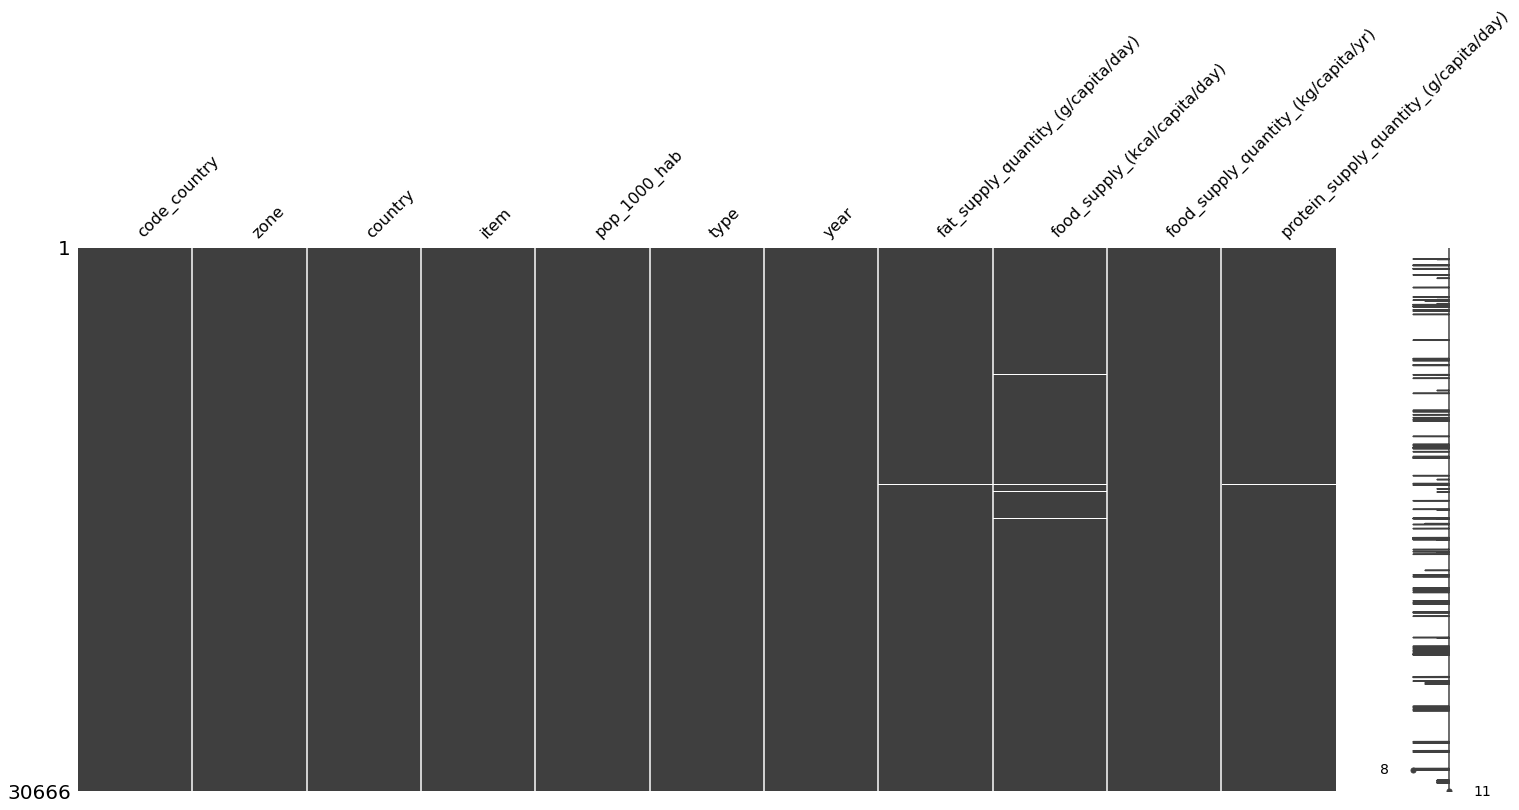

In [1267]:
import missingno as msno
msno.matrix(data)

In [1268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30666 entries, 0 to 30665
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   code_country                            30666 non-null  int64  
 1   zone                                    30666 non-null  object 
 2   country                                 30666 non-null  object 
 3   item                                    30666 non-null  object 
 4   pop_1000_hab                            30666 non-null  float64
 5   type                                    30666 non-null  object 
 6   year                                    30666 non-null  int64  
 7   fat_supply_quantity_(g/capita/day)      30447 non-null  float64
 8   food_supply_(kcal/capita/day)           30407 non-null  float64
 9   food_supply_quantity_(kg/capita/yr)     30666 non-null  float64
 10  protein_supply_quantity_(g/capita/day)  30445 non-null  fl

In [1269]:
data.isna()

,code_country,zone,country,item,pop_1000_hab,type,year,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
30661,False,False,False,False,False,False,False,False,False,False,False
30662,False,False,False,False,False,False,False,False,False,False,False
30663,False,False,False,False,False,False,False,False,False,False,False
30664,False,False,False,False,False,False,False,False,False,False,False


In [1270]:
data.drop('country', 1).isna().groupby(data.country, sort=False).sum().reset_index()

/var/folders/2l/lrfmhv4549d6_vj6k4zkk90c0000gn/T/ipykernel_14996/3810058129.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop('country', 1).isna().groupby(data.country, sort=False).sum().reset_index()


,country,code_country,zone,item,pop_1000_hab,type,year,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,Burundi,0,0,0,0,0,0,0,0,0,0
1,Comoros,0,0,0,0,0,0,0,0,0,0
2,Djibouti,0,0,0,0,0,0,0,0,0,0
3,Ethiopia,0,0,0,0,0,0,2,4,0,2
4,Kenya,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
174,Solomon Islands,0,0,0,0,0,0,0,0,0,0
175,Vanuatu,0,0,0,0,0,0,3,0,0,6
176,Kiribati,0,0,0,0,0,0,0,0,0,0
177,French Polynesia,0,0,0,0,0,0,0,0,0,0


In [1271]:
temp = data.drop('country', 1).isna().groupby(data.country, sort=False).sum().reset_index()

/var/folders/2l/lrfmhv4549d6_vj6k4zkk90c0000gn/T/ipykernel_14996/883093906.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  temp = data.drop('country', 1).isna().groupby(data.country, sort=False).sum().reset_index()


In [1272]:
temp = temp.set_index('country')
temp = temp.sum(axis=1)
temp.sort_values(ascending=False).head(5)

country
Chad                                     34
Democratic People's Republic of Korea    32
Albania                                  24
Haiti                                    24
Czechia                                  24
dtype: int64

Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays. Affichez les 5 pays avec le taux de croissance démographique le plus élevé.

In [1273]:
df_pop

,area_code_(fao),area,year,pop_1000_hab
0,2,Afghanistan,2018,37172.0
1,2,Afghanistan,2019,38042.0
2,3,Albania,2018,2883.0
3,3,Albania,2019,2881.0
4,4,Algeria,2018,42228.0
...,...,...,...,...
353,249,Yemen,2019,29162.0
354,251,Zambia,2018,17352.0
355,251,Zambia,2019,17861.0
356,181,Zimbabwe,2018,14439.0


In [1274]:
# On pivote les tables pour faciliter le calcul
df_pop_pivot = df_pop.pivot_table(
    index=['area', 'area_code_(fao)'],
    columns= ['year'],
    values='pop_1000_hab'
).reset_index()

In [1275]:
# calcul du taux de croissance
df_pop_pivot['taux_de_croissance'] = (df_pop_pivot[2019] - df_pop_pivot[2018]) / df_pop_pivot[2018]

In [1276]:
# Restriction des colonnes pour ajouter le strict nécessaire
df_pop_pivot_tx = df_pop_pivot[['area', 'taux_de_croissance']]

In [1277]:
# ajout du taux de croissance au jeu de données principal
data = pd.merge(data, df_pop_pivot_tx, left_on='country',right_on='area').drop('area', axis=1)

Quel est le taux de croissance moyen en fonction de la zone géographique ?

In [1297]:
data.groupby('zone')['taux_de_croissance'].mean().sort_values(ascending=False)

zone
western_africa           0.026344
middle_africa            0.026285
eastern_africa           0.023585
melanesia                0.017430
micronesia               0.017241
central_asia             0.017138
northern_africa          0.017065
southern_asia            0.016049
southern_africa          0.014679
central_america          0.013623
western_asia             0.013015
south_eastern_asia       0.011672
australia_new_zealand    0.010331
south_america            0.008972
northern_america         0.007550
caribbean                0.007060
eastern_asia             0.005987
polynesia                0.004335
western_europe           0.002682
northern_europe          0.002221
southern_europe         -0.001863
eastern_europe          -0.002178
Name: taux_de_croissance, dtype: float64

Calculez la disponibilité de nourriture totale par pays et par année, en kcal et kg de protéines. Attention aux unités de mesure !

In [1304]:
data

,code_country,zone,country,item,pop_1000_hab,type,year,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),taux_de_croissance,food_supply_quantity_(kg/total/yr),protein_supply_quantity_(kg/total/year),food_supply_(kcal/total/year)
0,29,eastern_africa,Burundi,Apples and products,11175.37,vegetal,2018,0.00,0.0,0.01,0.00,0.031785,1.117537e+02,0.000000,0.000000e+00
1,29,eastern_africa,Burundi,Apples and products,11530.58,vegetal,2019,0.00,0.0,0.01,0.00,0.031785,1.153058e+02,0.000000,0.000000e+00
2,29,eastern_africa,Burundi,Aquatic Plants,11175.37,animal,2018,0.00,0.0,0.00,0.00,0.031785,0.000000e+00,0.000000,0.000000e+00
3,29,eastern_africa,Burundi,Aquatic Plants,11530.58,animal,2019,0.00,0.0,0.00,0.00,0.031785,0.000000e+00,0.000000,0.000000e+00
4,29,eastern_africa,Burundi,Bananas,11175.37,vegetal,2018,0.27,164.0,99.63,2.73,0.031785,1.113402e+06,11135.697437,6.689576e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30661,244,polynesia,Samoa,Wheat and products,197.00,vegetal,2019,6.63,589.0,57.93,15.87,0.005102,1.141221e+04,1141.132350,4.235204e+10
30662,244,polynesia,Samoa,Wine,196.00,vegetal,2018,0.00,1.0,0.31,0.00,0.005102,6.076000e+01,0.000000,7.154000e+07
30663,244,polynesia,Samoa,Wine,197.00,vegetal,2019,0.00,2.0,0.57,0.00,0.005102,1.122900e+02,0.000000,1.438100e+08
30664,244,polynesia,Samoa,Yams,196.00,vegetal,2018,0.07,59.0,23.08,1.08,0.005102,4.523680e+03,77.263200,4.220860e+09


In [1302]:
data['food_supply_(kcal/total/year)'] = data['food_supply_(kcal/capita/day)'] * data['pop_1000_hab'] * 1000 * 365
data_kcal_total = data.groupby(['country', 'year'])['food_supply_(kcal/total/year)'].sum().sort_values(ascending=False).reset_index()
data_kcal_total

,country,year,food_supply_(kcal/total/year)
0,"China, mainland",2019,1.750543e+15
1,"China, mainland",2018,1.724813e+15
2,India,2019,1.284761e+15
3,India,2018,1.263415e+15
4,United States of America,2019,4.637398e+14
...,...,...,...
353,Antigua and Barbuda,2018,8.647872e+10
354,Dominica,2019,7.697412e+10
355,Dominica,2018,7.679016e+10
356,Saint Kitts and Nevis,2018,4.993638e+10


In [1305]:
data['protein_supply_quantity_(kg/total/year)'] = data['protein_supply_quantity_(g/capita/day)'] * data['pop_1000_hab'] * 365
data_prot_total = data.groupby(['country', 'year'])['protein_supply_quantity_(kg/total/year)'].sum().sort_values(ascending=False).reset_index()
data_prot_total

,country,year,protein_supply_quantity_(kg/total/year)
0,"China, mainland",2019,5.509630e+10
1,"China, mainland",2018,5.455307e+10
2,India,2019,3.234844e+10
3,India,2018,3.209143e+10
4,United States of America,2019,1.380289e+10
...,...,...,...
353,Antigua and Barbuda,2018,2.827027e+06
354,Dominica,2019,2.140769e+06
355,Dominica,2018,2.064557e+06
356,Saint Kitts and Nevis,2018,1.450831e+06


Calculez le ratio énergie/poids de chaque produit et pays. Vous devriez vous apercevoir qu’étonnement, ces informations varient en fonction du pays. Pour pallier ce problème, calculez la moyenne de ce ratio pour chaque aliment.  Attention à bien gérer les valeurs égales à 0. Vérifiez la cohérence de votre calcul en comparant le résultat avec l’apport calorique d’un œuf.

In [ ]:
# datanona = data.dropna(subset=['food_supply_(kcal/capita/day)', 'food_supply_quantity_(kg/capita/yr)'])

In [1298]:
datanona = data[~(data['food_supply_quantity_(kg/capita/yr)'] == 0)]

In [1299]:
datanona['ratio'] = (datanona['food_supply_(kcal/capita/day)']* 365) / datanona['food_supply_quantity_(kg/capita/yr)']

/var/folders/2l/lrfmhv4549d6_vj6k4zkk90c0000gn/T/ipykernel_14996/2952931998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanona['ratio'] = (datanona['food_supply_(kcal/capita/day)']* 365) / datanona['food_supply_quantity_(kg/capita/yr)']


In [1300]:
datanona[datanona['item'] == 'Cocoa Beans and products'].sort_values(by='ratio', ascending=False)

,code_country,zone,country,item,pop_1000_hab,type,year,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),taux_de_croissance,food_supply_quantity_(kg/total/yr),protein_supply_quantity_(kg/total/year),food_supply_(kcal/total/year),ratio
26876,273,southern_europe,Montenegro,Cocoa Beans and products,628.0,vegetal,2018,7.34,81.0,0.01,0.91,0.000000,6.28,208.59020,1.856682e+10,2.956500e+06
20345,50,western_asia,Cyprus,Cocoa Beans and products,1199.0,vegetal,2019,4.13,46.0,0.01,0.54,0.008410,11.99,236.32290,2.013121e+10,1.679000e+06
20344,50,western_asia,Cyprus,Cocoa Beans and products,1189.0,vegetal,2018,4.03,45.0,0.01,0.53,0.008410,11.89,230.01205,1.952932e+10,1.642500e+06
26877,273,southern_europe,Montenegro,Cocoa Beans and products,628.0,vegetal,2019,7.24,80.0,0.02,0.88,0.000000,12.56,201.71360,1.833760e+10,1.460000e+06
15659,96,eastern_asia,"China, Hong Kong SAR",Cocoa Beans and products,7372.0,vegetal,2018,3.54,39.0,0.01,0.44,0.008681,73.72,1183.94320,1.049404e+11,1.423500e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474,197,western_africa,Sierra Leone,Cocoa Beans and products,7650.0,vegetal,2018,0.40,4.0,0.30,0.05,0.021307,2295.00,139.61250,1.116900e+10,4.866667e+03
28701,150,western_europe,Netherlands,Cocoa Beans and products,17060.0,vegetal,2018,0.36,4.0,0.36,0.02,0.002169,6141.60,124.53800,2.490760e+10,4.055556e+03
28702,150,western_europe,Netherlands,Cocoa Beans and products,17097.0,vegetal,2019,0.29,3.0,0.29,0.01,0.002169,4958.13,62.40405,1.872122e+10,3.775862e+03
1951,226,eastern_africa,Uganda,Cocoa Beans and products,42729.0,vegetal,2018,0.04,0.0,0.02,0.01,0.036064,854.58,155.96085,0.000000e+00,0.000000e+00


In [1301]:
kcal_kg = datanona.groupby('item').ratio.mean()

In [ ]:
kcal_kg[kcal_kg.index == 'Eggs']

item
Eggs    1344.68654
Name: ratio, dtype: float64

In [ ]:
kcal_kg.sort_values()

item
Aquatic Animals, Others           37.858471
Molluscs, Other                   76.385029
Lemons, Limes and products       122.658550
Grapefruit and products          146.937924
Tea (including mate)             185.339365
                                  ...      
Oilcrops Oil, Other            16657.757634
Rape and Mustard Oil           19340.388650
Fats, Animals, Raw             23355.431657
Cocoa Beans and products      241095.641494
Alcohol, Non-Food                       NaN
Name: ratio, Length: 95, dtype: float64

In [ ]:
kcal_kg.sort_values(ascending=False).head(6)

item
Cocoa Beans and products    241095.641494
Fats, Animals, Raw           23355.431657
Rape and Mustard Oil         19340.388650
Oilcrops Oil, Other          16657.757634
Cottonseed Oil               10978.709921
Soyabean Oil                  9469.831225
Name: ratio, dtype: float64

In [ ]:
data[data.item == 'Cocoa Beans and products'].sort_values(by='food_supply_(kcal/capita/day)', ascending=False)

,code_country,zone,country,item,pop_1000_hab,type,year,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),taux_de_croissance,food_supply_quantity_(kg/total/yr),food_supply_(kcal/total/day)
28544,256,western_europe,Luxembourg,Cocoa Beans and products,616.00,vegetal,2019,10.03,111.0,0.00,1.25,0.019868,0.00,68376.0
28543,256,western_europe,Luxembourg,Cocoa Beans and products,604.00,vegetal,2018,9.71,107.0,0.00,1.23,0.019868,0.00,64628.0
26876,273,southern_europe,Montenegro,Cocoa Beans and products,628.00,vegetal,2018,7.34,81.0,0.01,0.91,0.000000,6.28,50868.0
26877,273,southern_europe,Montenegro,Cocoa Beans and products,628.00,vegetal,2019,7.24,80.0,0.02,0.88,0.000000,12.56,50240.0
24869,104,northern_europe,Ireland,Cocoa Beans and products,4882.00,vegetal,2019,6.41,71.0,0.03,0.75,0.013073,146.46,346622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,250,middle_africa,Democratic Republic of the Congo,Cocoa Beans and products,86791.00,vegetal,2019,0.02,0.0,0.00,0.00,0.032390,0.00,0.0
3572,250,middle_africa,Democratic Republic of the Congo,Cocoa Beans and products,84068.00,vegetal,2018,0.02,0.0,0.00,0.00,0.032390,0.00,0.0
3213,39,middle_africa,Chad,Cocoa Beans and products,15947.00,vegetal,2019,0.02,0.0,0.00,0.00,0.030301,0.00,0.0
3212,39,middle_africa,Chad,Cocoa Beans and products,15478.00,vegetal,2018,0.01,0.0,0.00,0.00,0.030301,0.00,0.0


À l’instar de la question précédente, calculez le pourcentage de protéine de chaque aliment. Vérifiez votre résultat en le comparant avec l’apport en protéines d’un œuf.

In [ ]:
# datanona = data.dropna(subset=['protein_supply_quantity_(g/capita/day)', 'food_supply_quantity_(kg/capita/yr)'])

In [1317]:
datanona = data[~(data['food_supply_quantity_(kg/capita/yr)'] == 0)]

In [1318]:
datanona['percentage_prot'] = (datanona['protein_supply_quantity_(g/capita/day)']) / (datanona['food_supply_quantity_(kg/capita/yr)'] * 1000 / 365 )

/var/folders/2l/lrfmhv4549d6_vj6k4zkk90c0000gn/T/ipykernel_14996/3434019829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanona['percentage_prot'] = (datanona['protein_supply_quantity_(g/capita/day)']) / (datanona['food_supply_quantity_(kg/capita/yr)'] * 1000 / 365 )


In [1319]:
datanona['percentage_prot'].isna().sum()

7

In [1320]:
datanona = datanona.dropna(subset=['percentage_prot'])

In [1321]:
percent_prot = datanona.groupby('item')['percentage_prot'].mean()

In [1322]:
percent_prot['Eggs']

0.10757662628414066

Quels sont les 10 aliments les plus caloriques ?

In [1315]:
kcal_kg.sort_values(ascending=False).head(11)

item
Cocoa Beans and products    241095.641494
Fats, Animals, Raw           23355.431657
Rape and Mustard Oil         19340.388650
Oilcrops Oil, Other          16657.757634
Cottonseed Oil               10978.709921
Soyabean Oil                  9469.831225
Ricebran Oil                  9181.623436
Palm Oil                      8955.479620
Coconut Oil                   8906.745583
Sunflowerseed Oil             8623.079377
Palmkernel Oil                8383.646128
Name: ratio, dtype: float64

Quels sont les 10 aliments les plus riches en protéines ?

In [1314]:
percent_prot.sort_values(ascending=False).head(11)

item
Cocoa Beans and products      3.023054
Peas                          0.228926
Beans                         0.218904
Meat, Other                   0.218541
Pulses, Other and products    0.217977
Groundnuts                    0.201766
Soyabeans                     0.180646
Offals, Edible                0.176061
Oilcrops, Other               0.174763
Sesame seed                   0.173430
Rape and Mustardseed          0.156429
Name: percentage_prot, dtype: float64

Créez une boîte à moustache de la quantité de nourriture par habitant en kcal par pays. Créez sur un même graphique un boxplot par zone géographique. Mettez un titre, changez les étiquettes des axes et changez la couleur en fonction de la zone géographique. Effectuez ce graphique en utilisant la librairie de visualisation matplotlib puis installez la librairie seaborn et refaites-le. Commentez les différences d’utilisation entre ces deux librairies.

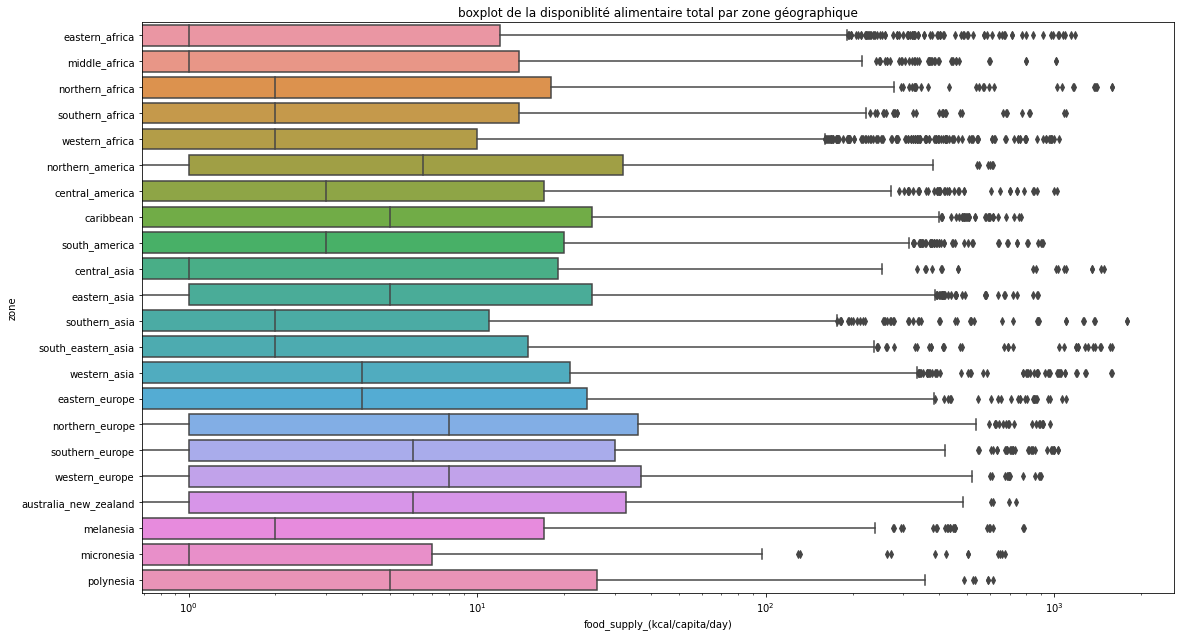

In [ ]:
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

sns.boxplot(data=data, x=data['food_supply_(kcal/capita/day)'], y='zone', whis= 15, ax=ax)
plt.xscale('log')
plt.title('boxplot de la disponiblité alimentaire total par zone géographique')
plt.show()

Question bonus : Avec la disponibilité alimentaire de produits végétaux combien d’être humains pourrait-on nourrir ?

In [1311]:
data[data['type'] == 'vegetal']['food_supply_(kcal/total/year)'].sum() / (2600 * 365)

14195287277.026922